Héctor E. Delgado Díaz  
ASTR 511  
Prof. Mario Juric 
Homework #2

## Problem 1  

In Lecture 6 (Slide 12), we’ve introduced the isochrone potential:

$$\Phi(r) = \frac{GM}{b + \sqrt{b^2 + r^2}} $$


Show that it behaves as a harmonic oscillator in the core (for r << b) and as the potential of a point mass at large distances (for r >> b). Expand it to second order in Taylor series around r = 0 for the former, and observe the limit Φ(r) as r → ∞ for the latter.

### Answer  

For r << b, r can be taken as a point r = 0 for expanding on a Taylor series. Expanded to second order will give (using wolfram for efficency):

$$ \Phi(r) = -\frac{GM}{2b} + \frac{GM}{8b^3}r^2 $$

When comparing to the general equation for a spherical harmonic oscillator:

$$ \Phi(r) = A + Br^2 $$

It can be seen that $A = -\frac{GM}{2b}$ while $B = \frac{GM}{8b^3}$. Furthermore, taking the derivative of the potential when r << b with respect to r:

$$ \frac{d\Phi(r)}{dr} = -\frac{2GM}{8b^3}r $$

$$  \frac{d\Phi(r)}{dr} = -\frac{GM}{4b^3}r = -\frac{k}{m}r $$

For a particle of mass m with a spring constant k, $\frac{k}{m}=\frac{GM}{4b^3}$. Therefore, at r << b behaves like a spherical harmonic oscillator.

Now, for r >> b the isochrone potential can be written as:

$$ \Phi(r) = -\frac{GM}{r(\frac{b}{r}+\sqrt{\frac{b^2}{r^2}+1})} $$

As the $lim_{r \rightarrow \infty} \Phi(r)$, $\frac{b}{r}\rightarrow 0$, hence:

$$ \Phi(r) = -\frac{GM}{r} $$

Which is also the first order of the Laurent series for this potential, where the Taylor series is given by $|r| < |b|$ and the Laurent is given by $|r| > |b|$. The latter shows that at r >> b the isochrone potential behaves as a point mass potential.

## Problem 2 

Using galpy’s galpy.potential.plotRotcurve function, plot the normalized rotation curve given by the sum of these three potentials in the range of [0, 10] eﬀective radii. Plot their individual contributions to circular speed on the same plot. Use the following parameters: a = 0.5, b = 0.0375, normalize = .6 for Myamoto-Nagai, a = 4.5, normalize = .35 for NFW, and a = 0.6/8, normalize = 0.05 for Hernquist.

Discuss how the combined rotation curve compares to the observed rotation curves of galaxies. Which component makes the dominant contribution to circular velocity at R = 1 (inner parts of a galaxy)? What about at R = 10?

In [2]:
# Import standard libraries including galpy

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import copy
import pandas as pd
import scipy
import galpy
from galpy.potential import plotRotcurve
from galpy.potential import IsochronePotential
from galpy.orbit import Orbit

plt.rcParams["font.family"] = "Times New Roman"

In [3]:
# From galpy potentials, import MiyamotoNagai, NFW and Hernquist potentials

from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential

In [4]:
# From the potentials, assign them to variables and sum them from r = [0,10] using the parameters given on the problem

mnp = MiyamotoNagaiPotential(a=0.5, b=0.0375, normalize=.6)
nfw = NFWPotential(a=4.5, normalize=.35)
hep = HernquistPotential(a=0.6/8,normalize=0.05)

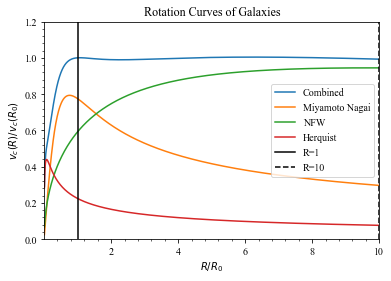

In [5]:
# Using galpy.potential.plotRotcurve, plot each curve and the combined potential.

plotRotcurve(mnp + nfw + hep, Rrange=[0.01,10.], grid=1001, yrange=[0.,1.2], label='Combined')
mnp.plotRotcurve(Rrange=[0.01,10.], grid=1001, overplot=True, label='Miyamoto Nagai')
nfw.plotRotcurve(Rrange=[0.01,10.], grid=1001, overplot=True, label='NFW')
hep.plotRotcurve(Rrange=[0.01,10.], grid=1001, overplot=True, label='Herquist')

# Add a line in R = 1 and R = 10 to study which potential contributes the most

plt.axvline(1, label='R=1', color='k')
plt.axvline(10, linestyle='--', label='R=10', color='k')
plt.legend()
plt.title('Rotation Curves of Galaxies')
plt.show()

### Answer  

Comparing the combined plot to observations from NGC 2403, 2841, 2903, 3198, they all have about the same behavior. When looking at the plot at $R = 1$, the Miyamoto Nagai potential is the major component of the combined potential. This model focuses on the potential contributed by the disk. Because of its flattened shape, it can extend the bulge of the galaxy and have greater contribution to the rotational velocity outside of the galactic center. Meanwhile the NFW model takes into account dark matter, which its effect tends to be mostly in the outer region of the galaxy as seen on the $R = 10$ region, hence NFW contributes the most there. As for the Hernquist model, its a potential-density pair relation which decays almost classicaly as the density decreases exponentially when distancing from the center so its contribution to the rotational velocity is not significant far from the center.

## Problem 3  

Use galpy’s orbit plotting routines (see the ’Orbit Integration’ section in galpy documentation) to plot the R, z plane motion of a particle orbiting in an isochrone potential with b = 1 whose initial coordinates are (R, z) = (1, 0), and the radial, tangential, and z velocity (vR , vT , vz ) = (1, 1.1, 0.1).

What are the initial velocities that results in a circular orbit? Demonstrate by plotting it (it’s ﬁne to plot it in either in R − z or x − y planes).

### Answer

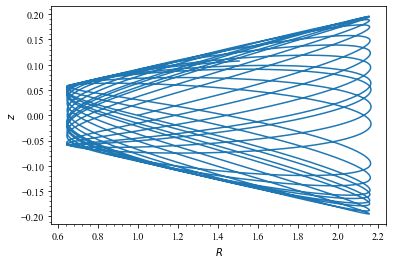

In [9]:
# From the given parameters, define the desired isochrone potential with b=1 and (R,z) = (1,0) 
# with z velocity (v R , v T , v z ) = (1, 1.1, 0.1). Because default values for b and amp are 1, no need to add them.

ip = IsochronePotential(normalize=True)

R = 1.
vR = 1.
vT = 1.1
z = 0.
vz = 0.1

# Using galpy.orbit.Orbit and the five parameters

orb = Orbit([R,vR,vT,z,vz])
ts = np.linspace(0,100,10000)
orb.integrate(ts,ip,method='odeint')

orb.plot()

For a circular orbit, the tangential velocity must be the only component of the velocity vector.
If there's a radial velocity component then it will have different trajectories while the same thing happens
For a z velocity as shown below. Also, the tangential velocity must be 1 so that it creates 1:1 proportion
between x and y. To be able to plot on the x-y axis, the orbit must be able to track the azimuth angle of x
So it needs a phi component. However, because it doesn't have a radial or z velocity component, it doesn't
matter what the azimuth angle is so it is set to 1 for simplicity. The point of origin along the z axis is
to 0

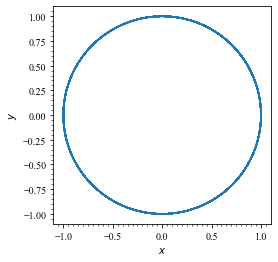

In [40]:
# Setting the v and phi components for the circular orbit

vz = 0
vR = 0
vT = 1
phi = 1

# Plot the orbit
o = Orbit([R,vR,vT,z,vz, phi])
o.integrate(ts,ip,method='odeint')
o.plot(d1='x', d2='y')
plt.axis('square')
plt.show()